使用设备: cuda
发现2个GPU
正在下载和准备数据集...
训练数据集大小: 2944
使用2个GPU进行训练
开始训练模型...


Epoch 1/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.78it/s, loss=2.5, acc=69.6] 


Epoch 1/10 - Train Loss: 3.0947, Train Acc: 36.35% - Val Loss: 2.5459, Val Acc: 69.57%
保存最佳模型 (验证准确率: 69.57%)


Epoch 2/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.93it/s, loss=1.78, acc=82.9]


Epoch 2/10 - Train Loss: 2.0750, Train Acc: 81.32% - Val Loss: 1.6946, Val Acc: 82.88%
保存最佳模型 (验证准确率: 82.88%)


Epoch 3/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.77it/s, loss=1.3, acc=90.1]  


Epoch 3/10 - Train Loss: 1.3602, Train Acc: 89.40% - Val Loss: 1.1361, Val Acc: 90.08%
保存最佳模型 (验证准确率: 90.08%)


Epoch 4/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.89it/s, loss=1.02, acc=91]   


Epoch 4/10 - Train Loss: 0.9352, Train Acc: 92.26% - Val Loss: 0.8376, Val Acc: 91.03%
保存最佳模型 (验证准确率: 91.03%)


Epoch 5/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.80it/s, loss=0.856, acc=90.8]


Epoch 5/10 - Train Loss: 0.7004, Train Acc: 93.00% - Val Loss: 0.6636, Val Acc: 90.76%


Epoch 6/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.79it/s, loss=0.787, acc=91.3]


Epoch 6/10 - Train Loss: 0.5621, Train Acc: 93.61% - Val Loss: 0.5664, Val Acc: 91.30%
保存最佳模型 (验证准确率: 91.30%)


Epoch 7/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.83it/s, loss=0.69, acc=92.1] 


Epoch 7/10 - Train Loss: 0.4759, Train Acc: 94.16% - Val Loss: 0.4864, Val Acc: 92.12%
保存最佳模型 (验证准确率: 92.12%)


Epoch 8/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.84it/s, loss=0.632, acc=92.1]


Epoch 8/10 - Train Loss: 0.4080, Train Acc: 94.29% - Val Loss: 0.4445, Val Acc: 92.12%


Epoch 9/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.77it/s, loss=0.686, acc=91.6]


Epoch 9/10 - Train Loss: 0.3676, Train Acc: 94.67% - Val Loss: 0.4019, Val Acc: 91.58%


Epoch 10/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.98it/s, loss=0.597, acc=92.5]


Epoch 10/10 - Train Loss: 0.3289, Train Acc: 94.87% - Val Loss: 0.3736, Val Acc: 92.53%
保存最佳模型 (验证准确率: 92.53%)


/tmp/ipykernel_3649908/1964505850.py:221: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vit_model_OxfordPets.pth'))


在测试集上评估模型...


评估模型: 100%|██████████| 115/115 [00:11<00:00,  9.77it/s]



分类报告:
                            precision    recall  f1-score   support

                Abyssinian       0.88      0.87      0.87        98
          American Bulldog       0.81      0.87      0.84       100
 American Pit Bull Terrier       0.84      0.72      0.77       100
              Basset Hound       0.99      0.95      0.97       100
                    Beagle       0.95      0.97      0.96       100
                    Bengal       0.68      0.78      0.73       100
                    Birman       0.71      0.72      0.71       100
                    Bombay       0.82      0.98      0.89        88
                     Boxer       0.88      0.96      0.92        99
         British Shorthair       0.91      0.78      0.84       100
                 Chihuahua       0.96      0.93      0.94       100
              Egyptian Mau       0.79      0.84      0.81        97
    English Cocker Spaniel       0.97      0.98      0.98       100
            English Setter       0.99   

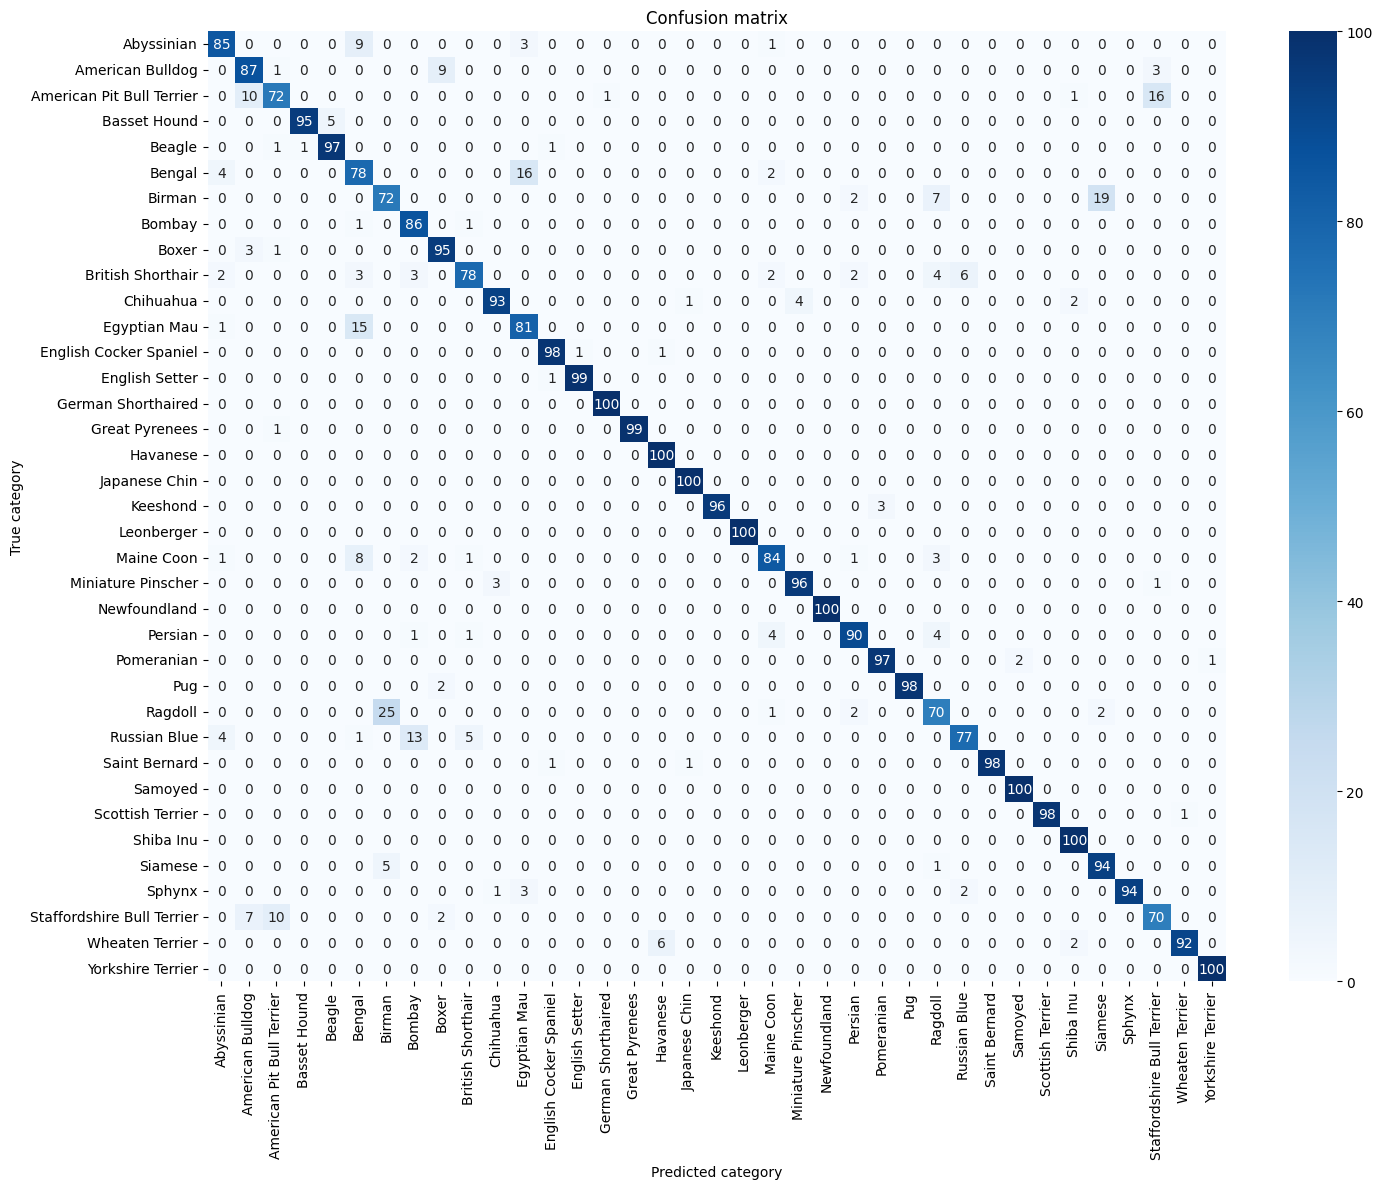

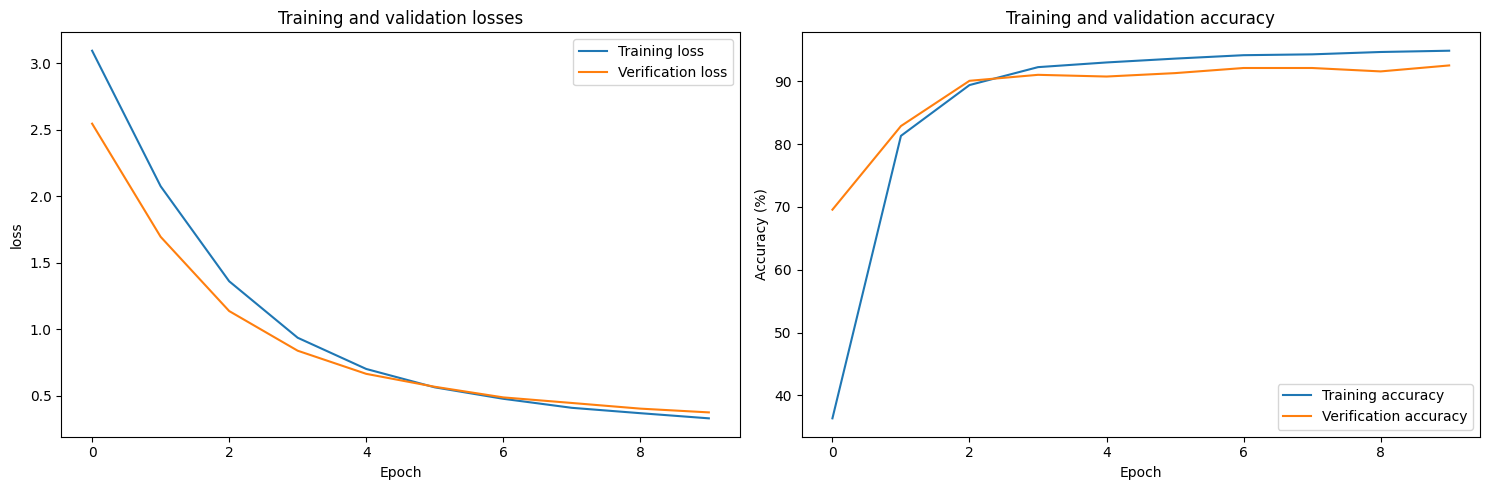

模型训练和评估完成!
混淆矩阵和训练历史已保存为图片文件.


In [1]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用预训练模型的默认转换
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 获取OxfordPets数据集
print("正在下载和准备数据集...")
dataset = datasets.OxfordIIITPet(
    root='./data',
    split='trainval',
    download=True,
    transform=train_transform
)

# 划分训练集和验证集
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 输出训练数据集大小
print(f"训练数据集大小: {len(train_dataset)}")

# 创建测试集
test_dataset = datasets.OxfordIIITPet(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 创建数据加载器
batch_size = 32

# 单GPU和多GPU都使用相同的数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 构建预训练ViT模型
def create_vit_model(num_classes=37):
    # 使用新API加载预训练的ViT模型
    model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
    
    # 冻结大部分预训练层，只训练分类头
    for param in model.parameters():
        param.requires_grad = False
    
    # 修改分类头以适应OxfordPets数据集
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 解冻分类头的参数
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# 实例化模型
model = create_vit_model()

# 使用DataParallel在多个GPU上并行运行
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器
# 只优化需要训练的参数（即分类头的参数）
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    [p for p in model.parameters() if p.requires_grad], 
    lr=1e-4
)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 训练函数
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 对于DataParallel模型，需要保存model.module
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'best_vit_model_OxfordPets.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 训练模型
print("开始训练模型...")
epochs = 10  # 预训练模型通常需要更少的训练轮数
history = train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 评估模型
def evaluate_model(model, data_loader, device):
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 加载最佳模型进行评估
model = create_vit_model()
model.load_state_dict(torch.load('best_vit_model_OxfordPets.pth'))
model = model.to(device)

# 如果有多个GPU，在评估时也使用DataParallel
if device_count > 1:
    model = nn.DataParallel(model)

model.eval()

# 在测试集上评估
print("在测试集上评估模型...")
true_labels, predictions = evaluate_model(model, test_loader, device)

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=dataset.classes))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
plt.figure(figsize=(15, 12))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted category')
plt.ylabel('True category')
plt.title('Confusion matrix')
plt.tight_layout()
plt.savefig('confusion_matrix_OxfordPets.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_OxfordPets.png')
plt.show()
plt.close()

print("模型训练和评估完成!")
print("混淆矩阵和训练历史已保存为图片文件.")

使用设备: cuda
发现2个GPU
正在下载和准备数据集...
训练数据集大小: 1020
使用2个GPU进行训练
开始训练模型...


Epoch 1/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.22it/s, loss=3.49, acc=50.7]


Epoch 1/10 - Train Loss: 4.1300, Train Acc: 15.00% - Val Loss: 3.1806, Val Acc: 50.69%
保存最佳模型 (验证准确率: 50.69%)


Epoch 2/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.37it/s, loss=2.11, acc=68.8]


Epoch 2/10 - Train Loss: 2.4855, Train Acc: 67.84% - Val Loss: 2.2258, Val Acc: 68.82%
保存最佳模型 (验证准确率: 68.82%)


Epoch 3/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.18it/s, loss=1.64, acc=74.9] 


Epoch 3/10 - Train Loss: 1.5643, Train Acc: 87.06% - Val Loss: 1.7082, Val Acc: 74.90%
保存最佳模型 (验证准确率: 74.90%)


Epoch 4/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.35it/s, loss=1.32, acc=78.8] 


Epoch 4/10 - Train Loss: 1.0708, Train Acc: 93.73% - Val Loss: 1.4085, Val Acc: 78.82%
保存最佳模型 (验证准确率: 78.82%)


Epoch 5/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.25it/s, loss=1.28, acc=81.1] 


Epoch 5/10 - Train Loss: 0.7783, Train Acc: 94.31% - Val Loss: 1.2223, Val Acc: 81.08%
保存最佳模型 (验证准确率: 81.08%)


Epoch 6/10 [Val]: 100%|██████████| 32/32 [00:04<00:00,  7.78it/s, loss=0.993, acc=82.1]


Epoch 6/10 - Train Loss: 0.5984, Train Acc: 96.76% - Val Loss: 1.0894, Val Acc: 82.06%
保存最佳模型 (验证准确率: 82.06%)


Epoch 7/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.27it/s, loss=0.982, acc=84]  


Epoch 7/10 - Train Loss: 0.4768, Train Acc: 97.25% - Val Loss: 0.9977, Val Acc: 84.02%
保存最佳模型 (验证准确率: 84.02%)


Epoch 8/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.31it/s, loss=0.861, acc=84]  


Epoch 8/10 - Train Loss: 0.3783, Train Acc: 98.92% - Val Loss: 0.9295, Val Acc: 84.02%


Epoch 9/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.15it/s, loss=0.874, acc=84.4]


Epoch 9/10 - Train Loss: 0.2959, Train Acc: 99.41% - Val Loss: 0.8734, Val Acc: 84.41%
保存最佳模型 (验证准确率: 84.41%)


Epoch 10/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.39it/s, loss=0.794, acc=84.6]


Epoch 10/10 - Train Loss: 0.2668, Train Acc: 99.51% - Val Loss: 0.8337, Val Acc: 84.61%
保存最佳模型 (验证准确率: 84.61%)


/tmp/ipykernel_3649908/3323931835.py:231: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vit_model_Flowers102.pth'))


在测试集上评估模型...


评估模型: 100%|██████████| 193/193 [00:19<00:00,  9.99it/s]



分类报告:
              precision    recall  f1-score   support

     Class 1       0.76      0.80      0.78        20
     Class 2       1.00      0.93      0.96        40
     Class 3       0.52      0.70      0.60        20
     Class 4       0.51      0.50      0.51        36
     Class 5       0.87      0.91      0.89        45
     Class 6       1.00      0.88      0.94        25
     Class 7       0.53      0.90      0.67        20
     Class 8       0.96      0.98      0.97        65
     Class 9       0.61      0.88      0.72        26
    Class 10       1.00      0.96      0.98        25
    Class 11       0.88      0.52      0.65        67
    Class 12       0.88      0.96      0.91        67
    Class 13       1.00      1.00      1.00        29
    Class 14       0.93      0.96      0.95        28
    Class 15       0.67      0.83      0.74        29
    Class 16       0.39      0.86      0.54        21
    Class 17       0.92      0.89      0.91        65
    Class 18       0

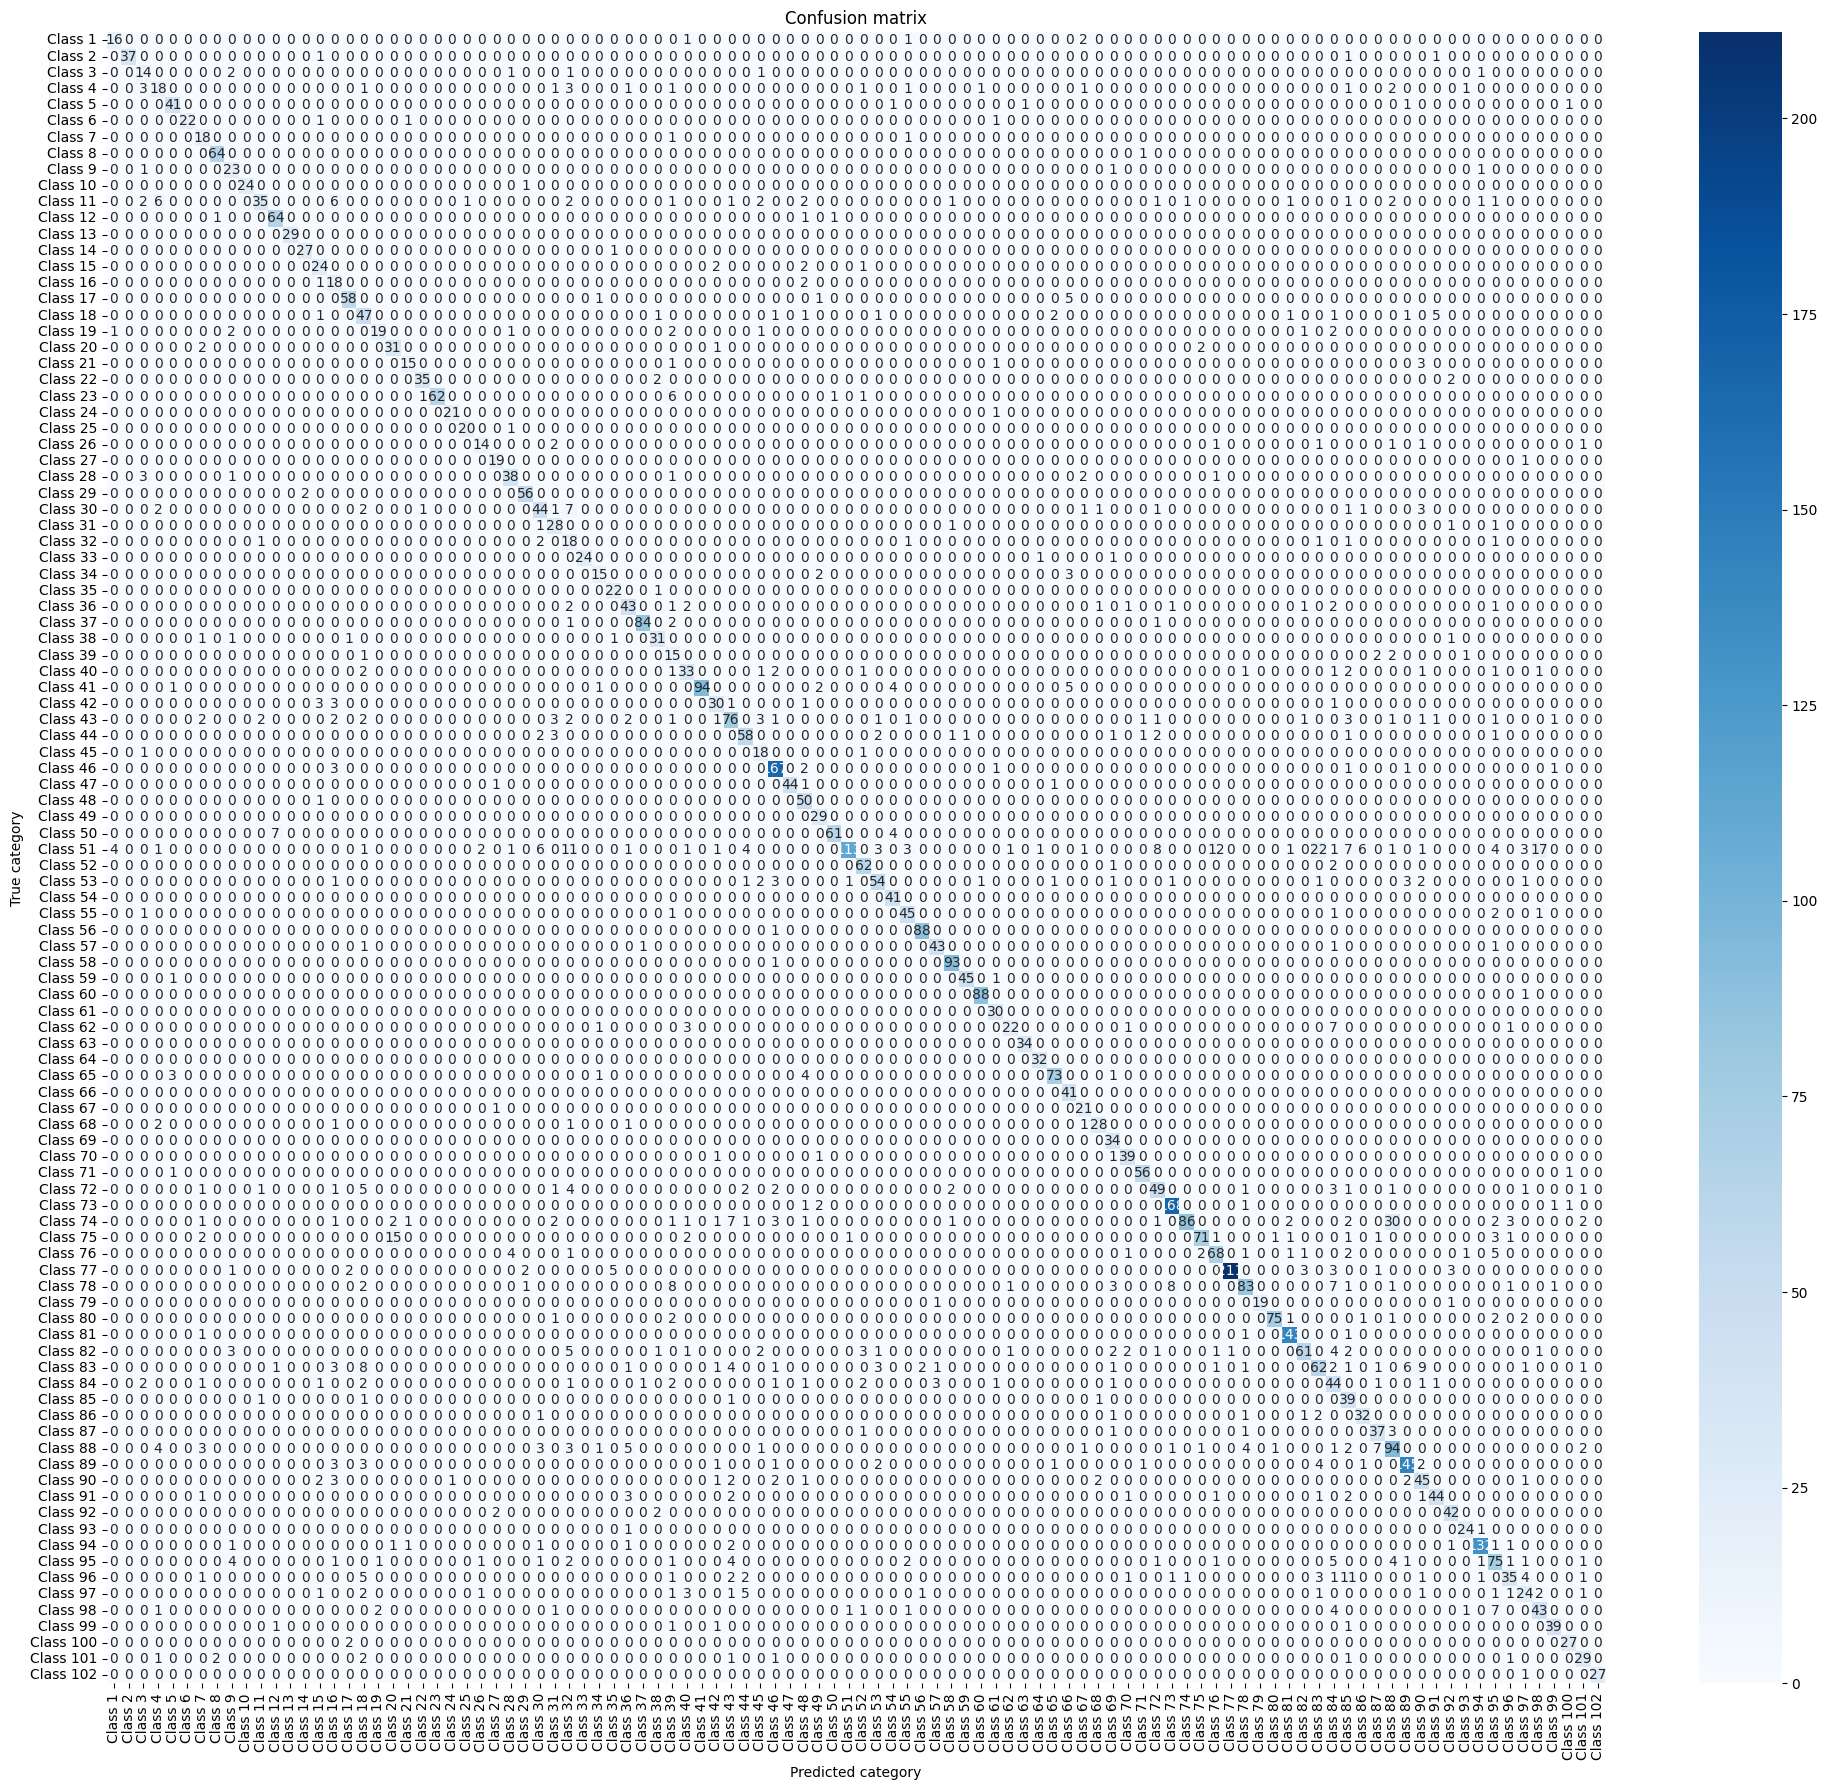

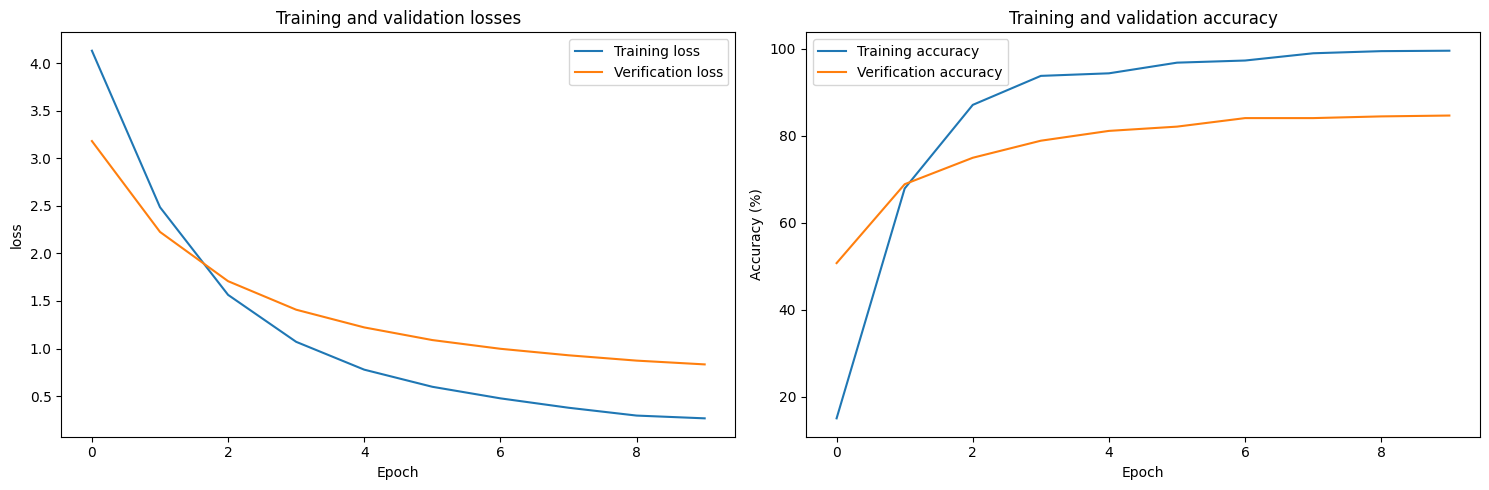

模型训练和评估完成!
混淆矩阵和训练历史已保存为图片文件.


In [2]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用预训练模型的默认转换
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 获取Oxford Flowers数据集
print("正在下载和准备数据集...")
dataset = datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=train_transform
)

# 训练集
train_dataset = datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=train_transform
)

# 验证集
val_dataset = datasets.Flowers102(
    root='./data',
    split='val',
    download=True,
    transform=test_transform
)

# 输出训练数据集大小
print(f"训练数据集大小: {len(train_dataset)}")

# 创建测试集
test_dataset = datasets.Flowers102(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 创建数据加载器
batch_size = 32

# 单GPU和多GPU都使用相同的数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 构建预训练ViT模型
def create_vit_model(num_classes=102):
    # 使用新API加载预训练的ViT模型
    model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
    
    # 冻结大部分预训练层，只训练分类头
    for param in model.parameters():
        param.requires_grad = False
    
    # 修改分类头以适应Oxford Flowers数据集
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 解冻分类头的参数
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# 实例化模型
model = create_vit_model()

# 使用DataParallel在多个GPU上并行运行
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器
# 只优化需要训练的参数（即分类头的参数）
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    [p for p in model.parameters() if p.requires_grad], 
    lr=1e-3
)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 训练函数
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 对于DataParallel模型，需要保存model.module
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'best_vit_model_Flowers102.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 训练模型
print("开始训练模型...")
epochs = 10  # 由于Flowers数据集更复杂，增加了训练轮数
history = train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 评估模型
def evaluate_model(model, data_loader, device):
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 加载最佳模型进行评估
model = create_vit_model()
model.load_state_dict(torch.load('best_vit_model_Flowers102.pth'))
model = model.to(device)

# 如果有多个GPU，在评估时也使用DataParallel
if device_count > 1:
    model = nn.DataParallel(model)

model.eval()

# 在测试集上评估
print("在测试集上评估模型...")
true_labels, predictions = evaluate_model(model, test_loader, device)

# 获取类别名称
# 加载 .mat 文件
labels_file = 'data/flowers-102/imagelabels.mat'
mat_data = loadmat(labels_file)

# 提取标签数据
# 根据 Flowers102 数据集的结构，标签通常存储在 'labels' 或 'imagelabels' 字段中
labels = mat_data['labels'].flatten()  # 或者 mat_data['imagelabels'].flatten()

class_names = np.unique(labels)
class_names = [f"Class {label}" for label in class_names]

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=class_names))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
plt.figure(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted category')
plt.ylabel('True category')
plt.title('Confusion matrix')
plt.tight_layout()
plt.savefig('confusion_matrix_Flowers102.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_Flowers102.png')
plt.show()
plt.close()

print("模型训练和评估完成!")
print("混淆矩阵和训练历史已保存为图片文件.")

使用设备: cuda
发现2个GPU
正在加载Flowers102数据集...
训练集大小: 1020
验证集大小: 1020
测试集大小: 6149
加载预训练的OxfordPets模型...


/tmp/ipykernel_3649908/242736459.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('best_vit_model_OxfordPets.pth', map_location=device)
/home/iid

使用2个GPU进行训练
开始在Flowers102数据集上微调分类器...


Epoch 1/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.22it/s, loss=3.24, acc=52.7]


Epoch 1/10 - Train Loss: 4.0963, Train Acc: 17.75% - Val Loss: 3.1941, Val Acc: 52.75%
保存最佳模型 (验证准确率: 52.75%)


Epoch 2/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.32it/s, loss=2.29, acc=68]  


Epoch 2/10 - Train Loss: 2.5134, Train Acc: 67.16% - Val Loss: 2.2598, Val Acc: 68.04%
保存最佳模型 (验证准确率: 68.04%)


Epoch 3/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.23it/s, loss=1.77, acc=75.8] 


Epoch 3/10 - Train Loss: 1.6168, Train Acc: 84.90% - Val Loss: 1.7413, Val Acc: 75.78%
保存最佳模型 (验证准确率: 75.78%)


Epoch 4/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.30it/s, loss=1.46, acc=79.5] 


Epoch 4/10 - Train Loss: 1.1151, Train Acc: 90.59% - Val Loss: 1.4400, Val Acc: 79.51%
保存最佳模型 (验证准确率: 79.51%)


Epoch 5/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.37it/s, loss=1.19, acc=81.6] 


Epoch 5/10 - Train Loss: 0.8242, Train Acc: 94.22% - Val Loss: 1.2538, Val Acc: 81.57%
保存最佳模型 (验证准确率: 81.57%)


Epoch 6/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.25it/s, loss=1.11, acc=81.2] 


Epoch 6/10 - Train Loss: 0.6421, Train Acc: 95.69% - Val Loss: 1.1270, Val Acc: 81.18%


Epoch 7/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.24it/s, loss=0.953, acc=82.5]


Epoch 7/10 - Train Loss: 0.5000, Train Acc: 97.06% - Val Loss: 1.0327, Val Acc: 82.55%
保存最佳模型 (验证准确率: 82.55%)


Epoch 8/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.20it/s, loss=0.926, acc=82.6]


Epoch 8/10 - Train Loss: 0.4117, Train Acc: 97.94% - Val Loss: 0.9582, Val Acc: 82.65%
保存最佳模型 (验证准确率: 82.65%)


Epoch 9/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.17it/s, loss=0.85, acc=84.3] 


Epoch 9/10 - Train Loss: 0.3537, Train Acc: 98.43% - Val Loss: 0.9026, Val Acc: 84.31%
保存最佳模型 (验证准确率: 84.31%)


Epoch 10/10 [Val]: 100%|██████████| 32/32 [00:03<00:00,  8.34it/s, loss=0.795, acc=84]  


Epoch 10/10 - Train Loss: 0.2841, Train Acc: 99.31% - Val Loss: 0.8663, Val Acc: 84.02%
加载预训练的OxfordPets模型...


/tmp/ipykernel_3649908/242736459.py:241: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('OxfordPets2Flowers102.pth', map_location=device

在测试集上评估最佳模型...


评估模型: 100%|██████████| 193/193 [00:19<00:00,  9.90it/s]



分类报告:
              precision    recall  f1-score   support

     Class 1       0.63      0.85      0.72        20
     Class 2       1.00      0.93      0.96        40
     Class 3       0.57      0.65      0.60        20
     Class 4       0.55      0.47      0.51        36
     Class 5       0.87      0.89      0.88        45
     Class 6       1.00      0.88      0.94        25
     Class 7       0.40      0.95      0.56        20
     Class 8       0.94      0.98      0.96        65
     Class 9       0.62      0.92      0.74        26
    Class 10       0.96      0.92      0.94        25
    Class 11       0.67      0.78      0.72        67
    Class 12       0.94      0.90      0.92        67
    Class 13       0.94      1.00      0.97        29
    Class 14       0.88      1.00      0.93        28
    Class 15       0.60      0.83      0.70        29
    Class 16       0.55      0.81      0.65        21
    Class 17       0.95      0.91      0.93        65
    Class 18       0

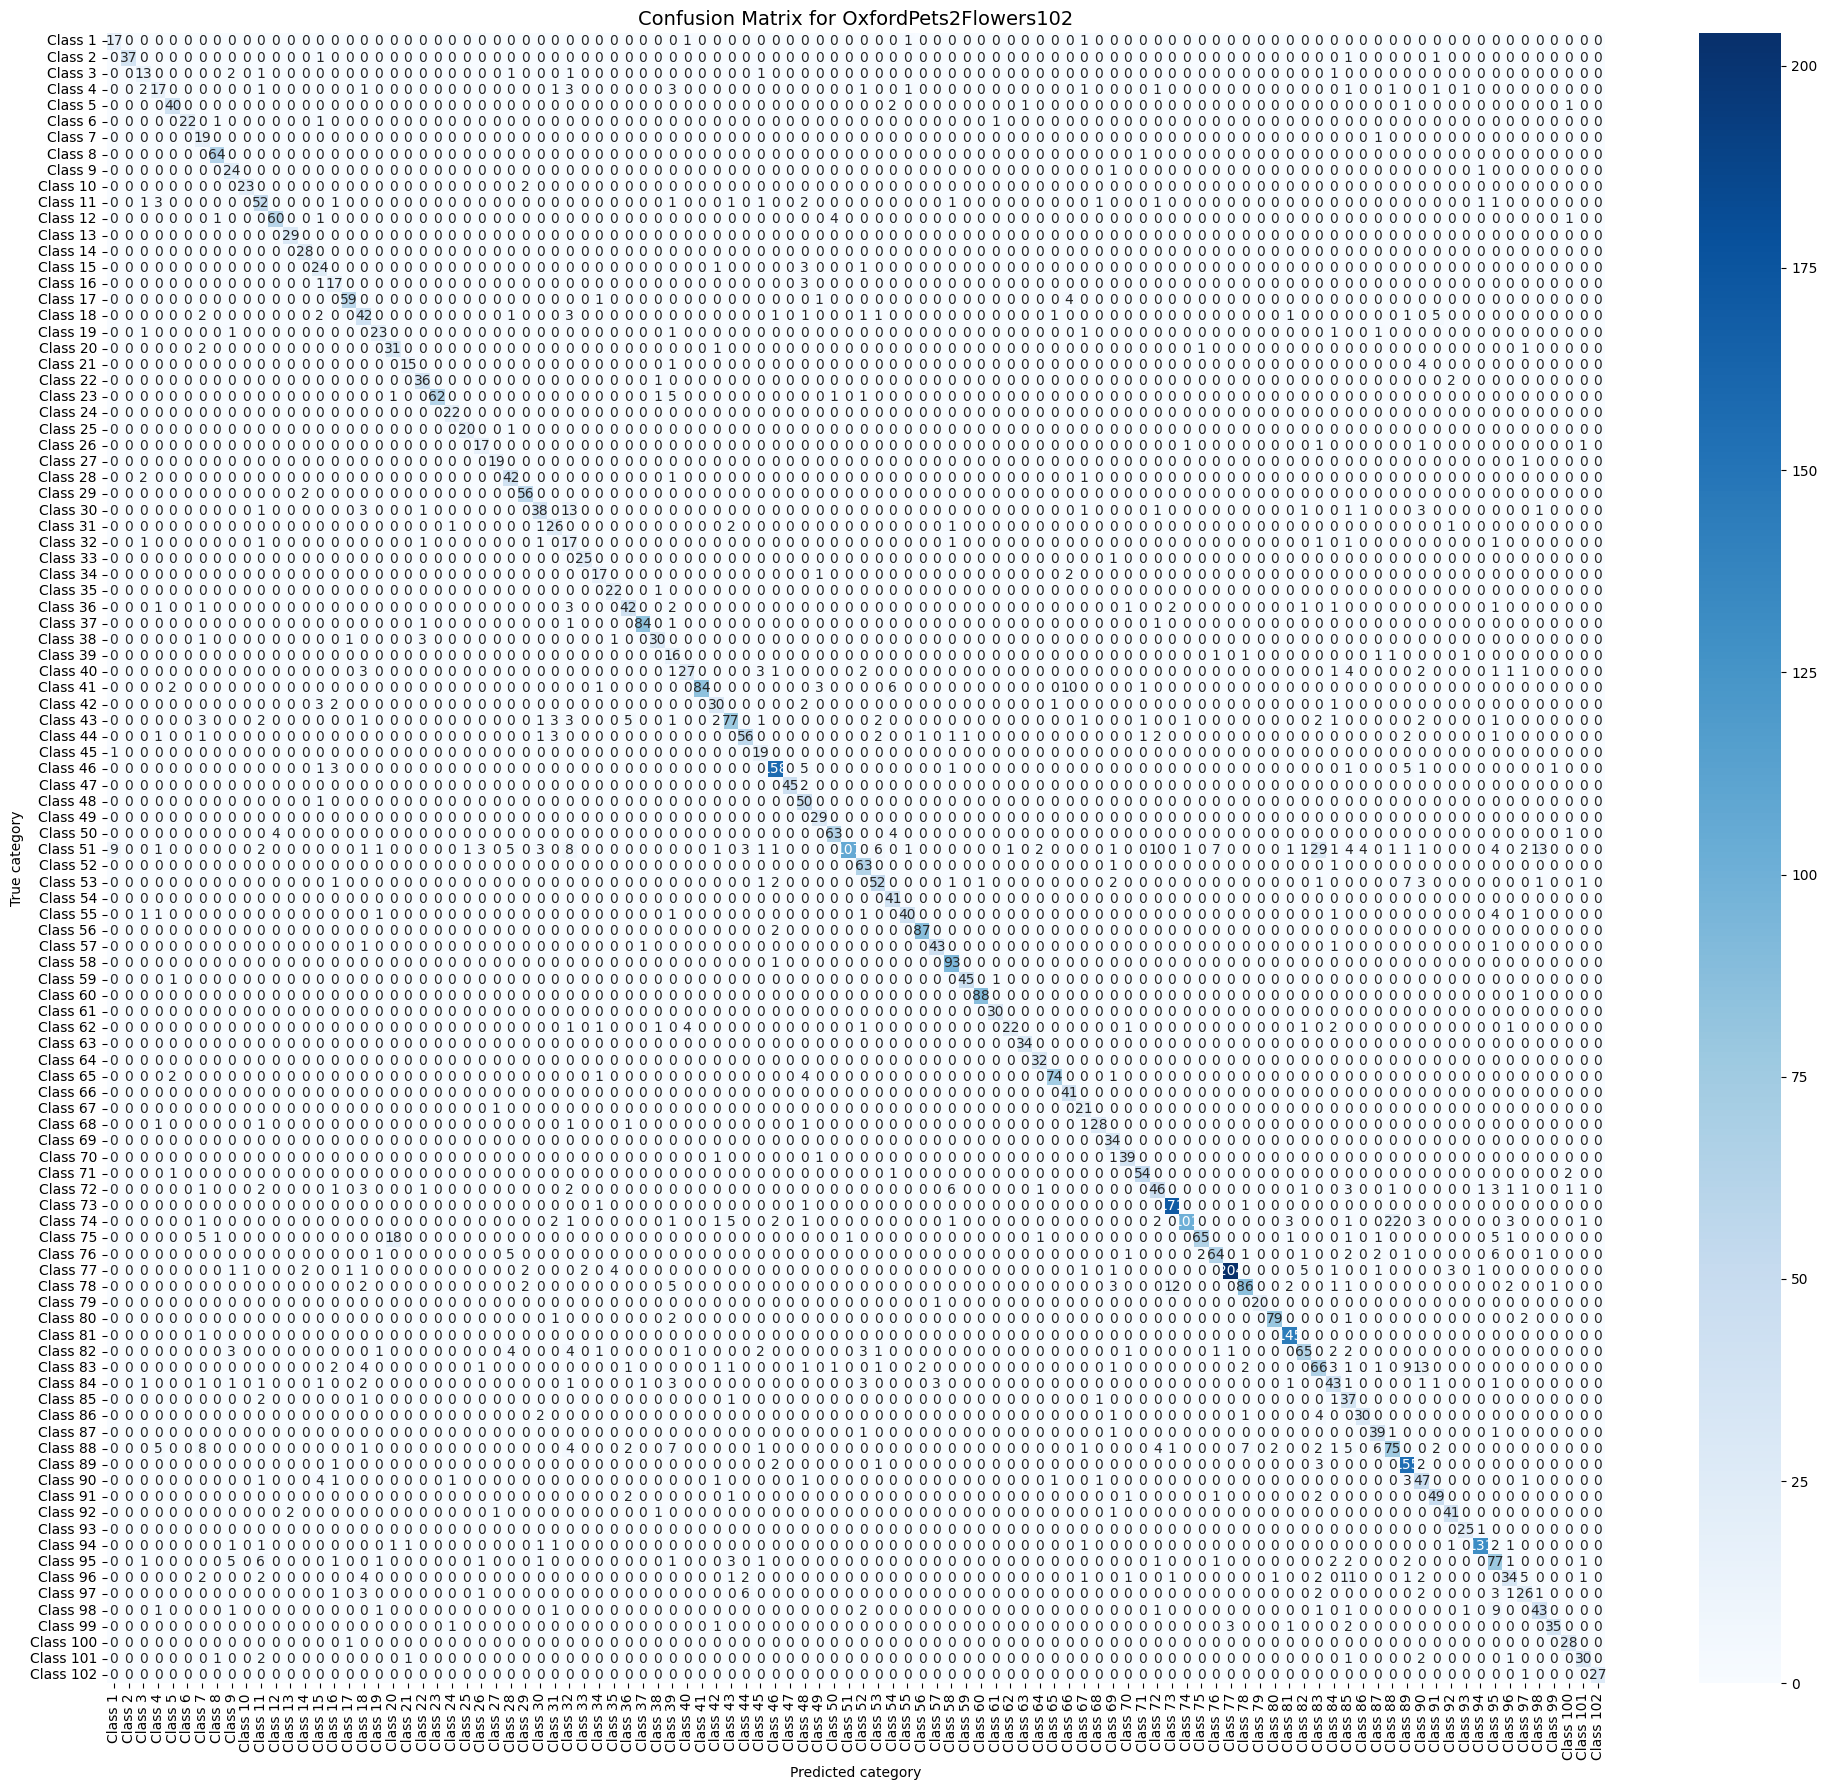

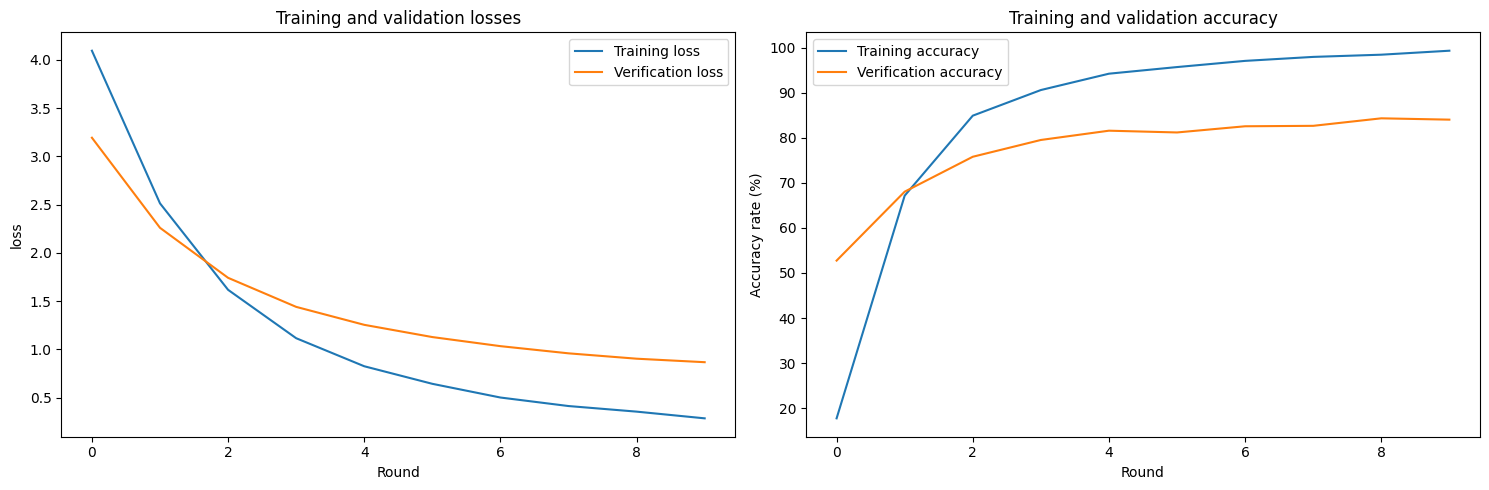

Flowers102模型微调完成!
最佳模型已保存为OxfordPets2Flowers102.pth
混淆矩阵和训练历史已保存为图片文件.


In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用与预训练模型一致的均值和标准差
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换 - 针对花卉数据的增强
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 加载Flowers102数据集
print("正在加载Flowers102数据集...")

# 训练集
train_dataset = datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=train_transform
)

# 验证集
val_dataset = datasets.Flowers102(
    root='./data',
    split='val',
    download=True,
    transform=test_transform
)

# 测试集
test_dataset = datasets.Flowers102(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 输出数据集大小
print(f"训练集大小: {len(train_dataset)}")
print(f"验证集大小: {len(val_dataset)}")
print(f"测试集大小: {len(test_dataset)}")

# 创建数据加载器
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 加载预训练模型并调整分类器
def create_flowers_model(num_classes=102):
    # 创建基础ViT模型
    model = vit_b_16()

    # 先将分类头调整为与保存的模型一致的输出维度（37类），以便加载权重
    model.heads.head = nn.Linear(model.hidden_dim, 37)
    
    # 加载在OxfordPets上预训练的权重
    print("加载预训练的OxfordPets模型...")
    state_dict = torch.load('best_vit_model_OxfordPets.pth', map_location=device)
    model.load_state_dict(state_dict)
    
    # 冻结所有特征提取层参数
    for param in model.parameters():
        param.requires_grad = False
    
    # 替换分类头以适应Flowers102数据集（102个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 确保分类头参数可训练
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# 实例化模型
model = create_flowers_model()

# 多GPU支持
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器（只优化分类头参数）
criterion = nn.CrossEntropyLoss()
# 根据是否使用DataParallel调整参数访问方式
if device_count > 1:
    optimizer = optim.Adam(
        model.module.heads.head.parameters(),  # 多GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )
else:
    optimizer = optim.Adam(
        model.heads.head.parameters(),  # 单GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# 训练函数
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 根据是否使用DataParallel调整保存方式
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'OxfordPets2Flowers102.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 评估函数
def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 训练模型
print("开始在Flowers102数据集上微调分类器...")
epochs = 10  # 微调分类器通常需要较少的轮次
history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 加载最佳模型进行最终评估
best_model = create_flowers_model()
best_model.load_state_dict(torch.load('OxfordPets2Flowers102.pth', map_location=device))
if device_count > 1:
    best_model = nn.DataParallel(best_model)
best_model = best_model.to(device)
best_model.eval()

# 在测试集上评估
print("在测试集上评估最佳模型...")
true_labels, predictions = evaluate_model(best_model, test_loader, device)

# 获取类别名称
# 加载 .mat 文件
labels_file = 'data/flowers-102/imagelabels.mat'
mat_data = loadmat(labels_file)

# 提取标签数据
# 根据 Flowers102 数据集的结构，标签通常存储在 'labels' 或 'imagelabels' 字段中
labels = mat_data['labels'].flatten()  # 或者 mat_data['imagelabels'].flatten()

class_names = np.unique(labels)
class_names = [f"Class {label}" for label in class_names]

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=class_names))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
plt.figure(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted category')
plt.ylabel('True category')
plt.title('Confusion Matrix for OxfordPets2Flowers102', fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig('confusion_matrix_OxfordPets2Flowers102.png')
plt.close()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Round')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Round')
plt.ylabel('Accuracy rate (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_OxfordPets2Flowers102.png')
plt.show()
plt.close()

print("Flowers102模型微调完成!")
print("最佳模型已保存为OxfordPets2Flowers102.pth")
print("混淆矩阵和训练历史已保存为图片文件.")

使用设备: cuda
发现2个GPU
正在加载OxfordPets数据集...
训练数据集大小: 2944
训练集大小: 2944
验证集大小: 736
测试集大小: 3669
加载预训练的Flowers102模型...


/tmp/ipykernel_3649908/3575437730.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('best_vit_model_Flowers102.pth', map_location=device)
/home/ii

使用2个GPU进行训练
开始在Flowers102数据集上微调分类器...


Epoch 1/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.75it/s, loss=0.563, acc=92.1]


Epoch 1/10 - Train Loss: 1.0405, Train Acc: 81.86% - Val Loss: 0.3418, Val Acc: 92.12%
保存最佳模型 (验证准确率: 92.12%)


Epoch 2/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.68it/s, loss=0.463, acc=93.2]


Epoch 2/10 - Train Loss: 0.2450, Train Acc: 94.87% - Val Loss: 0.2560, Val Acc: 93.21%
保存最佳模型 (验证准确率: 93.21%)


Epoch 3/10 [Val]: 100%|██████████| 23/23 [00:03<00:00,  7.52it/s, loss=0.408, acc=93.2] 


Epoch 3/10 - Train Loss: 0.1693, Train Acc: 95.99% - Val Loss: 0.2305, Val Acc: 93.21%


Epoch 4/10 [Val]: 100%|██████████| 23/23 [00:03<00:00,  7.48it/s, loss=0.397, acc=93.9] 


Epoch 4/10 - Train Loss: 0.1318, Train Acc: 96.98% - Val Loss: 0.1983, Val Acc: 93.89%
保存最佳模型 (验证准确率: 93.89%)


Epoch 5/10 [Val]: 100%|██████████| 23/23 [00:03<00:00,  7.65it/s, loss=0.373, acc=93.5] 


Epoch 5/10 - Train Loss: 0.0971, Train Acc: 98.17% - Val Loss: 0.1832, Val Acc: 93.48%


Epoch 6/10 [Val]: 100%|██████████| 23/23 [00:03<00:00,  7.66it/s, loss=0.389, acc=93.9] 


Epoch 6/10 - Train Loss: 0.0807, Train Acc: 98.51% - Val Loss: 0.1943, Val Acc: 93.89%


Epoch 7/10 [Val]: 100%|██████████| 23/23 [00:03<00:00,  7.44it/s, loss=0.304, acc=93.8] 


Epoch 7/10 - Train Loss: 0.0718, Train Acc: 98.71% - Val Loss: 0.1915, Val Acc: 93.75%


Epoch 8/10 [Val]: 100%|██████████| 23/23 [00:03<00:00,  7.56it/s, loss=0.349, acc=93.2] 


Epoch 8/10 - Train Loss: 0.0644, Train Acc: 98.74% - Val Loss: 0.1833, Val Acc: 93.21%


Epoch 9/10 [Val]: 100%|██████████| 23/23 [00:03<00:00,  7.54it/s, loss=0.335, acc=93.8] 


Epoch 9/10 - Train Loss: 0.0570, Train Acc: 98.98% - Val Loss: 0.1824, Val Acc: 93.75%


Epoch 10/10 [Val]: 100%|██████████| 23/23 [00:02<00:00,  7.69it/s, loss=0.348, acc=93.6] 


Epoch 10/10 - Train Loss: 0.0486, Train Acc: 99.35% - Val Loss: 0.1798, Val Acc: 93.61%
加载预训练的Flowers102模型...


/tmp/ipykernel_3649908/3575437730.py:240: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('Flowers1022OxfordPets.pth', map_location=devic

在测试集上评估最佳模型...


评估模型: 100%|██████████| 115/115 [00:11<00:00,  9.62it/s]



分类报告:
                            precision    recall  f1-score   support

                Abyssinian       0.89      0.85      0.87        98
          American Bulldog       0.86      0.92      0.89       100
 American Pit Bull Terrier       0.85      0.74      0.79       100
              Basset Hound       0.99      0.94      0.96       100
                    Beagle       0.93      0.97      0.95       100
                    Bengal       0.70      0.82      0.76       100
                    Birman       0.85      0.71      0.77       100
                    Bombay       0.83      0.98      0.90        88
                     Boxer       0.90      0.96      0.93        99
         British Shorthair       0.94      0.75      0.83       100
                 Chihuahua       0.97      0.94      0.95       100
              Egyptian Mau       0.80      0.84      0.82        97
    English Cocker Spaniel       0.98      0.97      0.97       100
            English Setter       0.98   

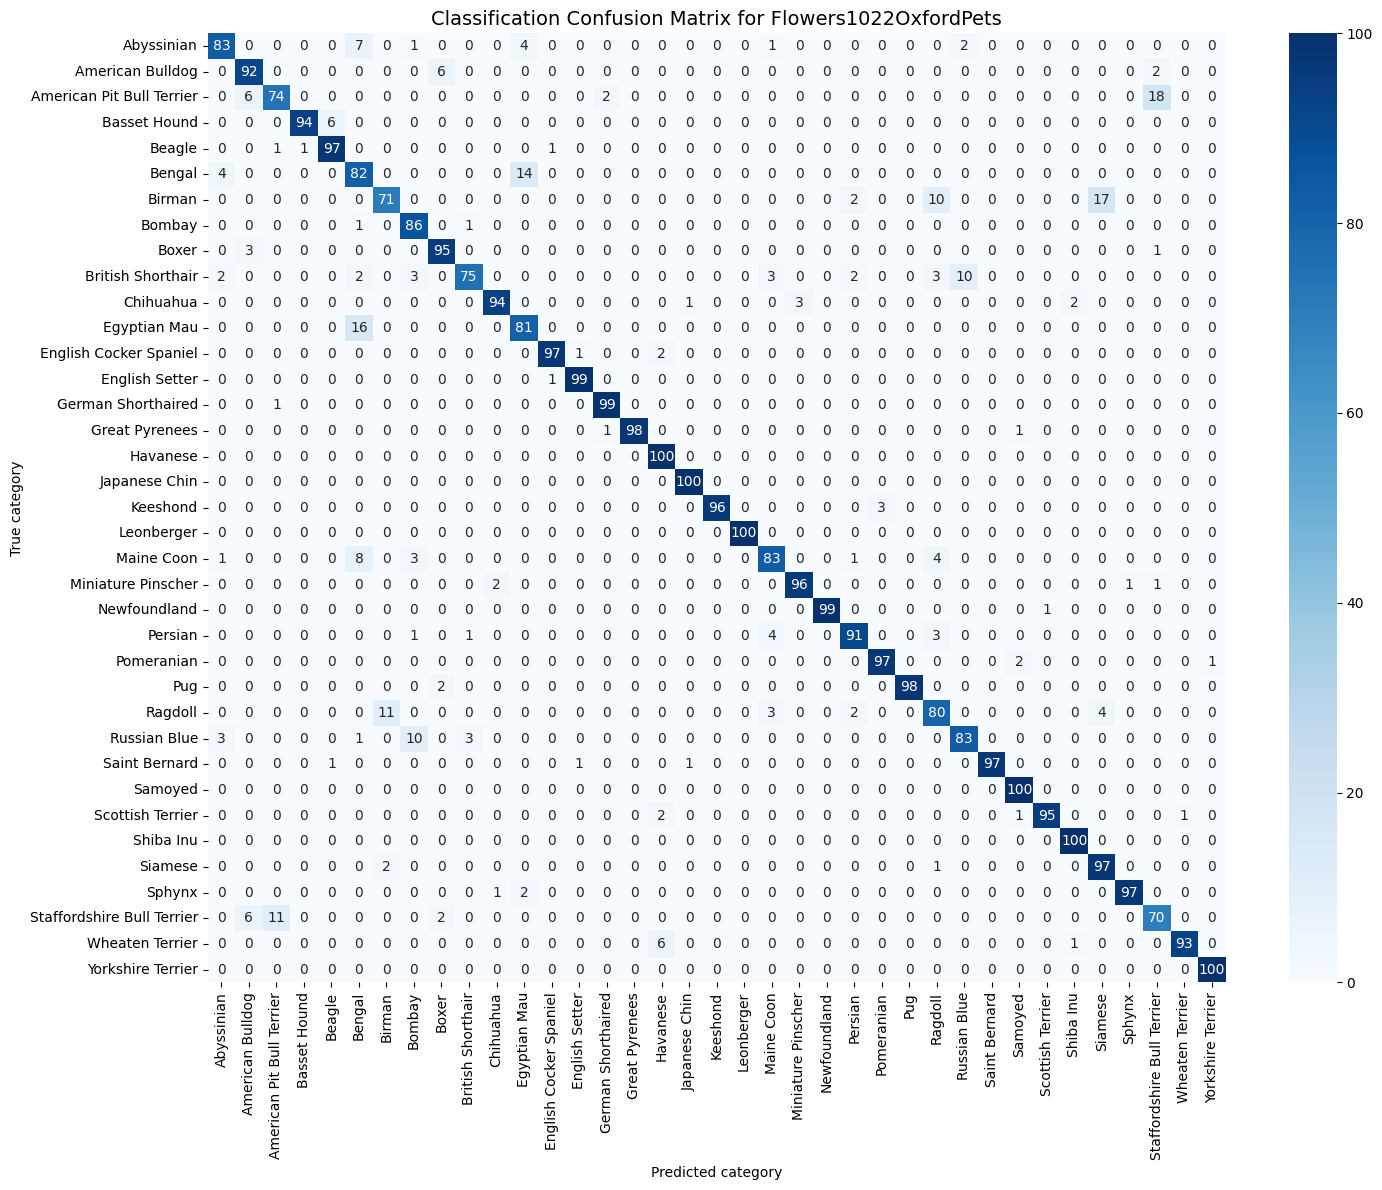

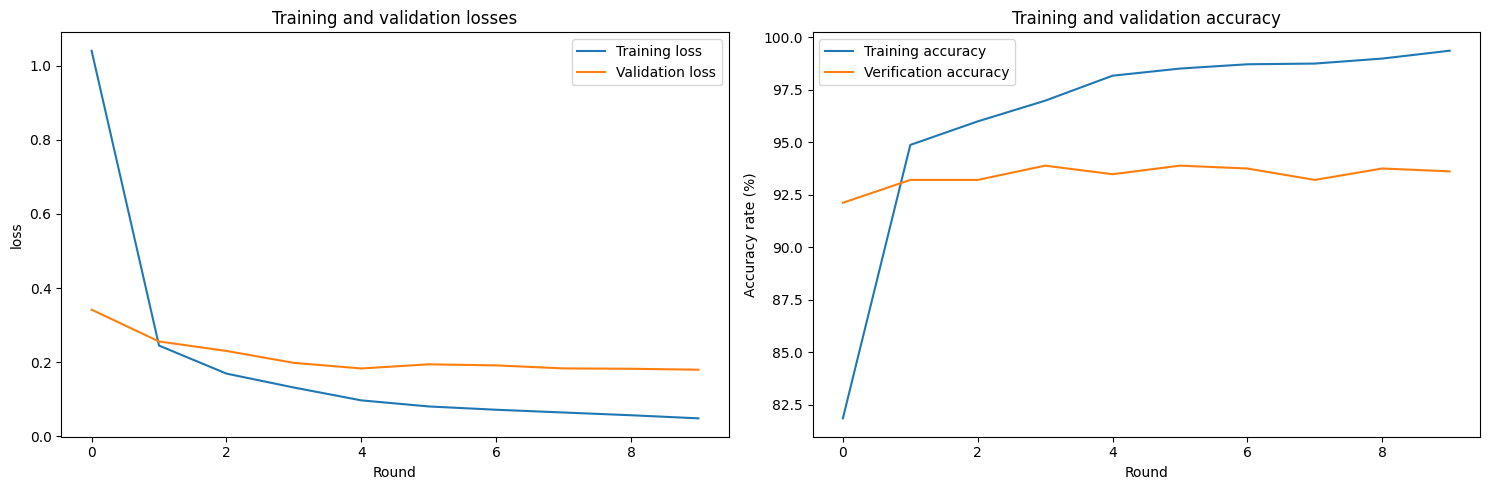

Flowers102模型微调完成!
最佳模型已保存为Flowers1022OxfordPets.pth
混淆矩阵和训练历史已保存为图片文件.


In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用与预训练模型一致的均值和标准差
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换 - 针对花卉数据的增强
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 加载OxfordPets数据集
print("正在加载OxfordPets数据集...")

dataset = datasets.OxfordIIITPet(
    root='./data',
    split='trainval',
    download=True,
    transform=train_transform
)

# 划分训练集和验证集
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 输出训练数据集大小
print(f"训练数据集大小: {len(train_dataset)}")

# 创建测试集
test_dataset = datasets.OxfordIIITPet(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 输出数据集大小
print(f"训练集大小: {len(train_dataset)}")
print(f"验证集大小: {len(val_dataset)}")
print(f"测试集大小: {len(test_dataset)}")

# 创建数据加载器
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 加载预训练模型并调整分类器
def create_flowers_model(num_classes=37):
    # 创建基础ViT模型
    model = vit_b_16()

    # 先将分类头调整为与保存的模型一致的输出维度（37类），以便加载权重
    model.heads.head = nn.Linear(model.hidden_dim, 102)
    
    # 加载在Flowers102上预训练的权重
    print("加载预训练的Flowers102模型...")
    state_dict = torch.load('best_vit_model_Flowers102.pth', map_location=device)
    model.load_state_dict(state_dict)
    
    # 冻结所有特征提取层参数
    for param in model.parameters():
        param.requires_grad = False
    
    # 替换分类头以适应OxfordPets数据集（37个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 确保分类头参数可训练
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# 实例化模型
model = create_flowers_model()

# 多GPU支持
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器（只优化分类头参数）
criterion = nn.CrossEntropyLoss()
# 根据是否使用DataParallel调整参数访问方式
if device_count > 1:
    optimizer = optim.Adam(
        model.module.heads.head.parameters(),  # 多GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )
else:
    optimizer = optim.Adam(
        model.heads.head.parameters(),  # 单GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# 训练函数
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 根据是否使用DataParallel调整保存方式
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'Flowers1022OxfordPets.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 评估函数
def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 训练模型
print("开始在Flowers102数据集上微调分类器...")
epochs = 10  # 微调分类器通常需要较少的轮次
history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 加载最佳模型进行最终评估
best_model = create_flowers_model()
best_model.load_state_dict(torch.load('Flowers1022OxfordPets.pth', map_location=device))
if device_count > 1:
    best_model = nn.DataParallel(best_model)
best_model = best_model.to(device)
best_model.eval()

# 在测试集上评估
print("在测试集上评估最佳模型...")
true_labels, predictions = evaluate_model(best_model, test_loader, device)

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=dataset.classes))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
plt.figure(figsize=(15, 12))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted category')
plt.ylabel('True category')
plt.title('Classification Confusion Matrix for Flowers1022OxfordPets', fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig('confusion_matrix_Flowers1022OxfordPets.png')
plt.close()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.xlabel('Round')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Round')
plt.ylabel('Accuracy rate (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_Flowers1022OxfordPets.png')
plt.show()
plt.close()

print("Flowers102模型微调完成!")
print("最佳模型已保存为Flowers1022OxfordPets.pth")
print("混淆矩阵和训练历史已保存为图片文件.")